In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
# import metnum #TODO: arreglar

/home/duerunner/UBA/ALGORITMOS/MetNum/TP3-MetNum/notebooks
Python 3.6.9


## Cargamos el dataset

In [2]:
# Carquemos el dataset 
df_train = pd.read_csv("../data/train.csv")
# Veamos el tamaño
display("Dimensiones: ", df_train.shape)
# Y sus primeras filas 
pd.set_option("display.max.columns", None)
#df_train.head(5)

'Dimensiones: '

(240000, 23)

In [3]:
df_train.dropna()
df_train.shape

(240000, 23)

## K-Fold Cross Validation
A la hora de realizar los experimentos al igual que en el tp anterior se debe usar cross-validation para evitar overfitting y obtener resultados estadisticamente mas robustos.

## Metricas
Se utilizan las funciones provistas por sklearn
###  RMSE 
- La raíz del error cuadrático medio 
###  RMSLE 
- Error logarítmico cuadrático medio

### R^2
- "is the proportion of the variance in the dependent variable that is predictable from the independent variable(s)"
- (Solo la usamos cuando sea necesario)

In [4]:
# Importo las funciones necesarias desde otro archivo nuestro
from extra_scripts import cross_validate, rmse, rmsle

# Experimento 1: Prediccion de Precios por M^2
Nos interesa predecir los precios en base a los metros totales del inmueble. 

In [5]:
# Todos los datos son del conjunto de train ya que el de test no tiene los precios.
# Usamos un muestra de 200000 viviendas que no tengan datos faltantes  y 2 mil para testear

shuffle = df_train.sample(random_state=np.random.seed(42), frac=1).dropna()
new_train = shuffle.iloc[:20000, :]
new_test = shuffle.iloc[20000:22000, :]

x_train, x_test = new_train["metrostotales"].values, new_test["metrostotales"].values
y_train, y_test = new_train["precio"].values, new_test["precio"].values

In [6]:
# Veamos el dataset que nos queda
train = new_train
display(train["metrostotales"].describe())

count    20000.000000
mean       151.533550
std         80.271926
min         15.000000
25%         90.000000
50%        130.000000
75%        198.000000
max        439.000000
Name: metrostotales, dtype: float64

In [7]:
sns.set(style="whitegrid")
train.describe()

,id,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.0000,20000.000000,20000.000000,2.000000e+04
mean,150589.352000,8.843850,2.875300,1.658150,2.007150,158.257500,151.533550,2.379830e+06,20.642265,-100.270785,0.070600,0.078050,0.0929,0.674950,0.642900,2.217098e+06
std,86999.292136,9.325782,0.838919,0.757969,0.859905,86.725836,80.271926,1.047595e+07,2.837374,5.225918,0.256162,0.268257,0.2903,0.468405,0.479157,1.834579e+06
min,2.000000,0.000000,1.000000,0.000000,1.000000,15.000000,15.000000,2.200000e+01,-34.612892,-118.318487,0.000000,0.000000,0.0000,0.000000,0.000000,3.100000e+05
25%,75349.250000,1.000000,2.000000,1.000000,1.000000,86.000000,90.000000,2.462500e+04,19.359352,-101.026605,0.000000,0.000000,0.0000,0.000000,0.000000,8.863995e+05
50%,151193.500000,5.000000,3.000000,2.000000,2.000000,140.000000,130.000000,5.567300e+04,19.535185,-99.239766,0.000000,0.000000,0.0000,1.000000,1.000000,1.650000e+06
75%,226384.000000,10.000000,3.000000,2.000000,3.000000,212.000000,198.000000,8.571200e+04,20.687234,-99.135474,0.000000,0.000000,0.0000,1.000000,1.000000,2.950000e+06
max,299991.000000,70.000000,10.000000,3.000000,4.000000,439.000000,439.000000,5.000400e+07,42.480744,0.000193,1.000000,1.000000,1.0000,1.000000,1.000000,1.252000e+07


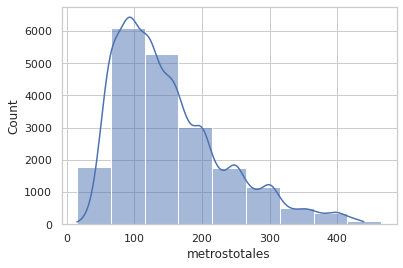

In [8]:
sns.histplot(data=train, x="metrostotales",binwidth=50,kde=True)

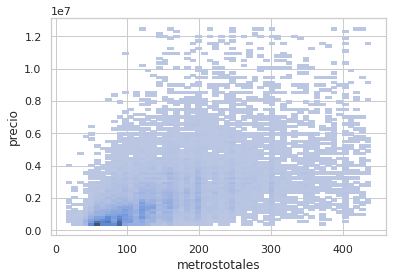

In [9]:
#Exploremos su relacion con los precios
sns.histplot(train, x="metrostotales", y="precio")

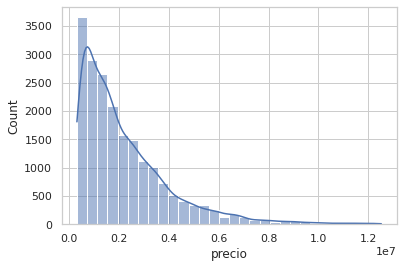

In [10]:
sns.histplot(data=train, x="precio",bins=30,kde=True)

In [11]:
from sklearn.linear_model import LinearRegression
# Ahora queremos entrenar el modelo
modelo = LinearRegression()
modelo.fit(x_train.reshape(-1, 1), y_train)
y_pred = modelo.predict(x_test.reshape(-1, 1))
y_pred = y_pred.reshape(y_pred.shape[0])

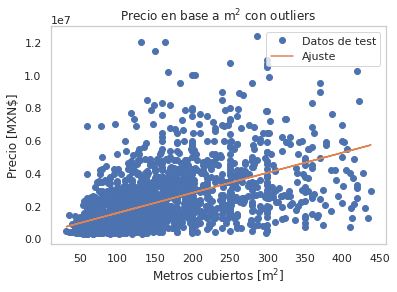

In [12]:
plt.figure("precio-metros-totales")
plt.plot(x_test, y_test, "o", label="Datos de test")
plt.plot(x_test, y_pred, "-", label="Ajuste")
plt.grid()
plt.legend()
plt.xlabel(r"Metros cubiertos [$\mathrm{m}^2$]")
plt.ylabel("Precio [MXN$]")
plt.title("Precio en base a $\mathrm{m}^2$ con outliers")
plt.savefig("Exp1/Precio-en-funcion-de-m2-con-outliers.png")
plt.show()

In [13]:
# Metricas del conjunto de training
results = cross_validate(10, x_train, y_train, True)

ValueError: Expected 2D array, got 1D array instead:
array=[121. 148. 115. ... 160. 140. 170.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [27]:
# Metricas del fitting

print(f"RMSE = {rmse(y_test, y_pred)}")
print(f"RMSLE = {rmsle(y_test, y_pred)}")

RMSE = 1565440.2410708186
RMSLE = 0.6914770299581168


In [32]:
from extra_scripts import remove_outliers

#Outliers Free train set
OF_new_train = remove_outliers(new_train, "metrostotales", 2)
OF_new_test = remove_outliers(new_test, "metrostotales", 2)
OF_new_train = remove_outliers(OF_new_train, "precio", 2)
OF_new_test = remove_outliers(OF_new_test, "precio", 2)

(19033, 23)
(1901, 23)
(18073, 23)
(1809, 23)


In [33]:
OF_x_train, OF_x_test = OF_new_train["metrostotales"].values, OF_new_test["metrostotales"].values
OF_y_train, OF_y_test = OF_new_train["precio"].values, OF_new_test["precio"].values

In [34]:
OF_modelo = LinearRegression()
OF_modelo.fit(OF_x_train.reshape(-1, 1), OF_y_train)
OF_y_pred = modelo.predict(OF_x_test.reshape(-1, 1))
OF_y_pred = OF_y_pred.reshape(OF_y_pred.shape[0])

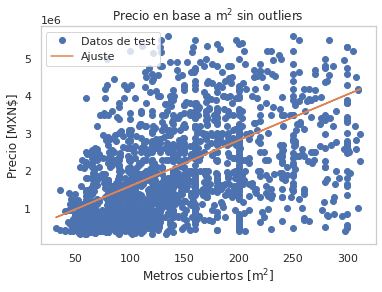

In [35]:
plt.figure("precio-metros-totales")
plt.plot(OF_x_test, OF_y_test, "o", label="Datos de test")
plt.plot(OF_x_test, OF_y_pred, "-", label="Ajuste")
plt.grid()
plt.legend()
plt.xlabel(r"Metros cubiertos [$\mathrm{m}^2$]")
plt.ylabel("Precio [MXN$]")
plt.title("Precio en base a $\mathrm{m}^2$ sin outliers")
plt.savefig("Exp1/Precio-en-funcion-de-m2-sin-outliers.png")
plt.show()

In [36]:
# Metricas del conjunto de training
OF_results = cross_validate(10, OF_x_train, OF_y_train, True)

ValueError: Expected 2D array, got 1D array instead:
array=[262.  52.  62. ... 160. 140. 170.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [37]:
# Metricas del fitting

print(f"RMSE = {rmse(OF_y_test, OF_y_pred)}")
print(f"RMSLE = {rmsle(OF_y_test, OF_y_pred)}")

RMSE = 1110395.376560755
RMSLE = 0.6719429337954242


In [38]:
#Muestro las diferencias entre los dos resultados en una tabla
WO_rmse = results["RMSE"]
WO_rmsle = results["RMSLE"]
OF_rmse = OF_results["RMSE"]
OF_rmsle = OF_results["RMSLE"]

print("With Outliers")
print(f" - RMSE = {(np.mean(WO_rmse), np.std(WO_rmse))}")
print(f" - RMSLE = {(np.mean(WO_rmsle), np.std(WO_rmsle))}")

print("No Outliers")
print(f" - RMSE = {(np.mean(OF_rmse), np.std(OF_rmse))}")
print(f" - RMSLE = {(np.mean(OF_rmsle), np.std(OF_rmsle))}")

print("Differences")
print(f" - RMSE = {(np.mean(WO_rmse) - np.mean(OF_rmse), np.std(WO_rmse) - np.std(OF_rmse))}")
print(f" - RMSLE = {(np.mean(WO_rmsle) - np.mean(OF_rmsle), np.std(WO_rmsle) - np.std(OF_rmsle))}")


NameError: name 'results' is not defined